# Read Images
Notebook to display images and do various test

In [1]:
import junodch_utils_read_img as utils

from math import ceil
import matplotlib.pyplot as matPlt
import numpy as np

import rasterio
from rasterio import plot as rastPlt

## Test display 
Display images from various satellites and extract an areas

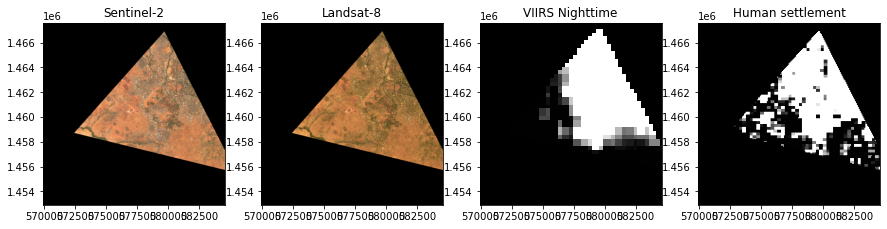

In [2]:
folderName = "img/Test/"
fig, axs = matPlt.subplots(1,4,figsize=(15,15))

axs[0].set_title("Sentinel-2")
with rasterio.open(folderName + "Sentinel-2_1.tif") as r:
    rastPlt.show(r, ax=axs[0])

axs[1].set_xlim(axs[0].get_xlim())
axs[1].set_ylim(axs[0].get_ylim())
axs[2].set_xlim(axs[0].get_xlim())
axs[2].set_ylim(axs[0].get_ylim())
axs[3].set_xlim(axs[0].get_xlim())
axs[3].set_ylim(axs[0].get_ylim())

axs[1].set_title("Landsat-8")
with rasterio.open(folderName + "Landsat-8_1.tif") as r: 
    rastPlt.show(r, ax=axs[1])

axs[2].set_title("VIIRS Nighttime")
with rasterio.open(folderName + "Night VIIRS_1.tif") as r:
    rastPlt.show(r, ax=axs[2])

axs[3].set_title("Human settlement")
with rasterio.open(folderName + "Population GHSL_1.tif") as r:
    rastPlt.show(r, ax=axs[3])


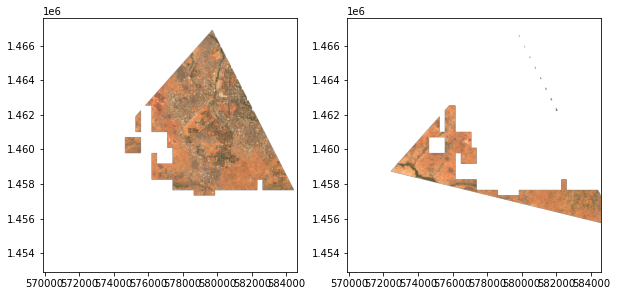

In [7]:
folderName = "img/Test/"
pathSatellite = folderName + "Sentinel-2_1.tif"
pathNight = folderName + "Night VIIRS_1.tif"
pathValidation = folderName + "Population GHSL_1.tif"

fig, axs = matPlt.subplots(1,2,figsize=(10,10))

aoi = utils.getImgBorder(pathSatellite)

# Fetch coords
dataCoords, dataRadiance = utils.getTilesCoordsPerimeter(pathNight, area=aoi)

threshold = 0.5

lightMask = dataRadiance>threshold
darkMask = dataRadiance<=threshold

lightCoords = dataCoords[lightMask]
darkCoords = dataCoords[darkMask]

# Fetch images
with rasterio.open(pathSatellite) as f:
  lightData, lightTransform = utils.getImgFromCoord(f, lightCoords, False)
  darkData, darkTransform = utils.getImgFromCoord(f, darkCoords, False)

  rastPlt.show(lightData, transform=lightTransform, ax=axs[0])
  rastPlt.show(darkData, transform=darkTransform, ax=axs[1])

## Tiles visualization
A look to the tiles on the day satellite images that produce light on the night images.

In [8]:
folderName = "img/Sokoto/"
pathSatellite = folderName + "Sentinel-2.tif"
pathNight = folderName + "Night_VIIRS.tif"
pathValidation = folderName + "Population_GHSL.tif"

aoi = utils.getImgBorder(pathSatellite)

dataCoords, dataRadiance = utils.getTilesCoordsPerimeter(pathNight, area=aoi)

#lightCoords = dataCoords[dataRadiance>200]

print('Tiles:',dataCoords.shape[0])
#print('Light Tile:',lightCoords.shape[0])

Tiles: 139113


In [17]:
def displayImgsInMask(dataCoords, pathSatellite, mask, res=64, toDisplayMax=40):
  coords = dataCoords[mask]
  size = coords.shape[0]
  print('Size:',size)

  titles = ['']*size
  for i, v in enumerate(np.argwhere(mask)):
    titles[i] = 'N° ' + str(v)

  with rasterio.open(pathSatellite) as f:
    steps = ceil(size/toDisplayMax)
    dataImgs, _ = utils.getEachImgFromCoord(f, coords[::steps], True)
    dataImgs = utils.formatData(dataImgs, res, False)
    
    utils.displayImgs(dataImgs, titles[::steps])


radiance = 1:
Size: 1


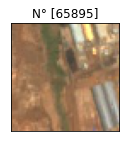

radiance >= 0.8:
Size: 17


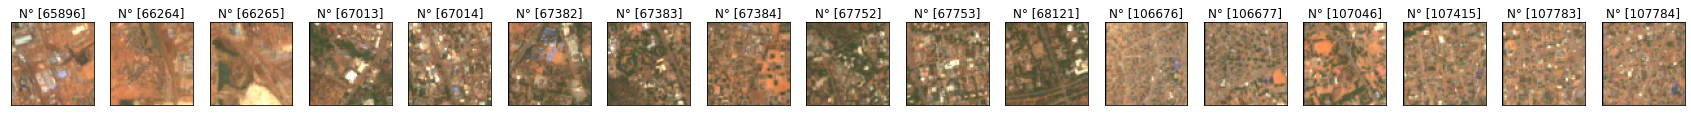

radiance >= 0.5:
Size: 246


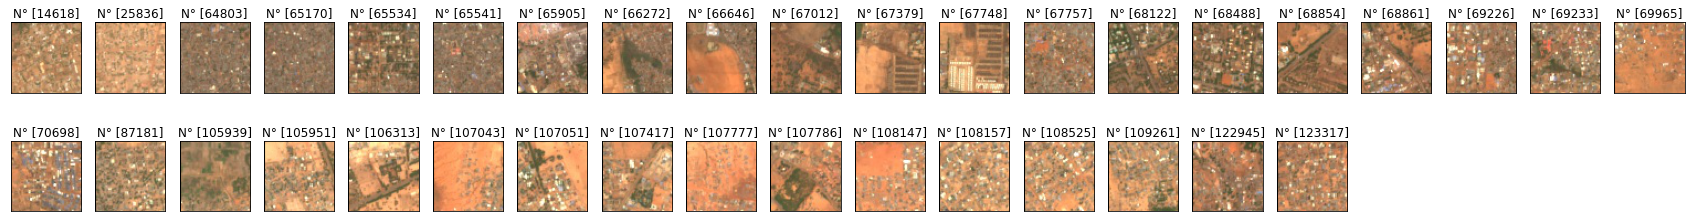

radiance >= 0.3:
Size: 153


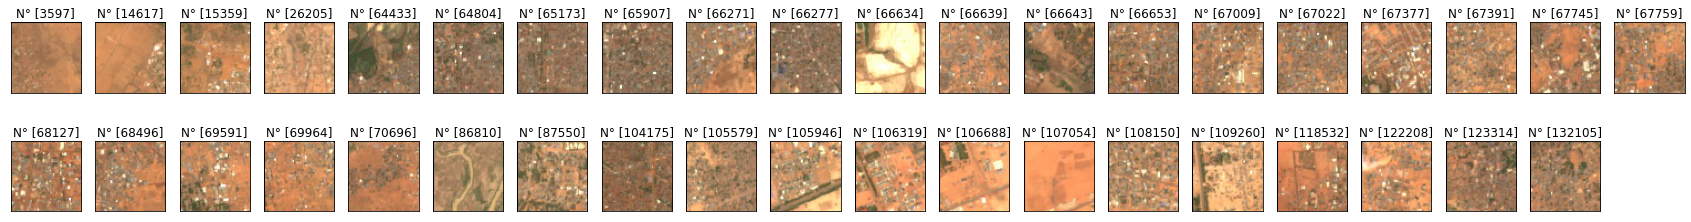

radiance > 0
Size: 272


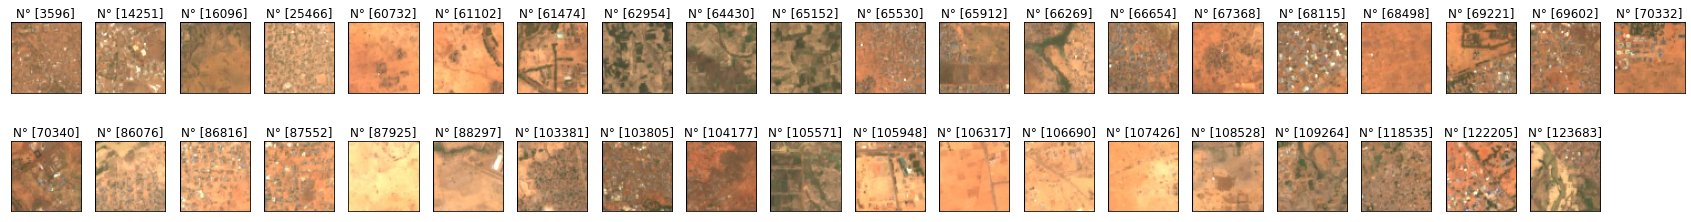

radiance == 0
Size: 138424


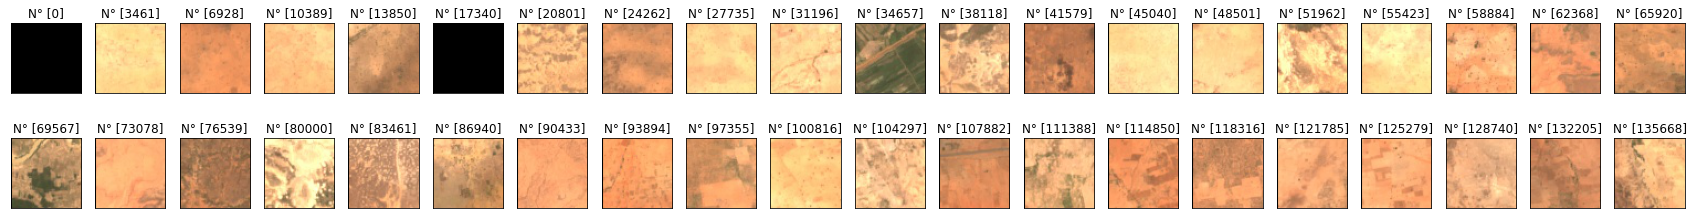

In [18]:
print('radiance = 1:')
displayImgsInMask(dataCoords, pathSatellite, dataRadiance>=1)
print('radiance >= 0.8:')
displayImgsInMask(dataCoords, pathSatellite, (dataRadiance<1) & (dataRadiance>=0.8))
print('radiance >= 0.5:')
displayImgsInMask(dataCoords, pathSatellite, (dataRadiance<0.8) & (dataRadiance>=0.5))
print('radiance >= 0.3:')
displayImgsInMask(dataCoords, pathSatellite, (dataRadiance<0.5) & (dataRadiance>=0.3))
print('radiance > 0')
displayImgsInMask(dataCoords, pathSatellite, (dataRadiance<0.3) & (dataRadiance>0))
print('radiance == 0')
displayImgsInMask(dataCoords, pathSatellite, (dataRadiance==0))